In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

# correlation_data csv를 불러옴
correlation_data = pd.read_csv(os.path.join(os.getcwd(), 'correlation_data_with_C_max.csv'))

correlation_data

# C_max값을 기준으로 이상치 제거


,File_name,Type,Objective_value,C_max,C_avg
0,prev_Truck_20_LP_0_0_100_1rep.csv,Min,63800,427.120,384.7000
1,now_Truck_20_LP_0_0_100_1rep.csv,Min,68000,436.192,390.1900
2,prev_Truck_20_LP_40_50_10_1rep.csv,Min,34751,413.552,382.6468
3,now_Truck_20_LP_40_50_10_1rep.csv,Min,34924,451.584,394.8568
4,prev_Truck_20_LP_0_0_100_1rep.csv,Middle,98400,466.880,428.1868
...,...,...,...,...,...
235,now_Truck_20_LP_40_50_10_20rep.csv,Middle,48319,458.872,421.6148
236,prev_Truck_20_LP_0_0_100_20rep.csv,Max,112800,490.896,439.8356
237,now_Truck_20_LP_0_0_100_20rep.csv,Max,115600,490.912,435.9680
238,prev_Truck_20_LP_40_50_10_20rep.csv,Max,59834,480.576,437.9800


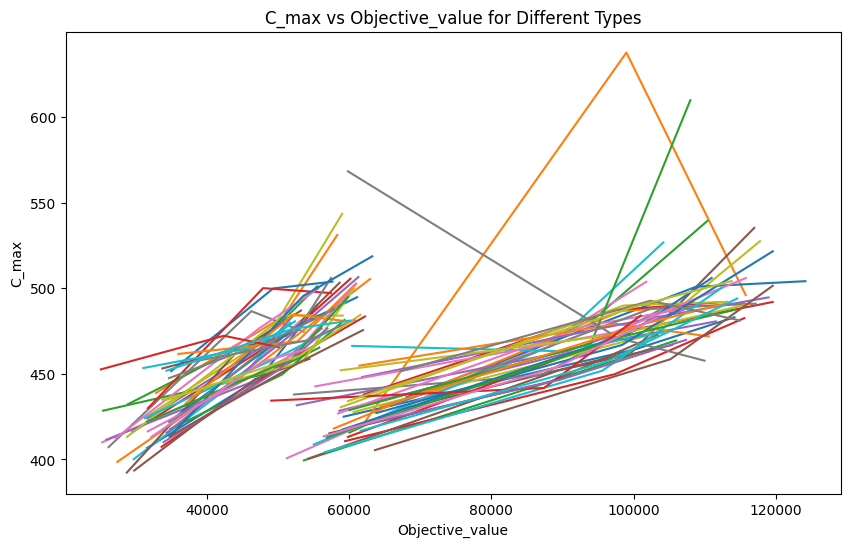

In [25]:
# File_name에서 Min, Middle, Max 순으로 정렬
correlation_data['Type'] = pd.Categorical(correlation_data['Type'], categories=['Min', 'Middle', 'Max'], ordered=True)
# 'File_name'을 기준으로 데이터 분류
grouped_data = correlation_data.groupby('File_name')

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# Type 값에 따라 그래프 그리기
for name, group in grouped_data:
    group = group.sort_values(by='Type')  # Type 기준으로 정렬
    ax.plot(group['Objective_value'], group['C_max'], label=name)

# 그래프에 레이블, 제목 등 추가
ax.set_xlabel('Objective_value')
ax.set_ylabel('C_max')
ax.set_title('C_max vs Objective_value for Different Types')
# ax.legend()
plt.show()

Min_T_Obj_mean:  1.0
Middle_T_Obj_mean:  1.6072787805460507
Max_T_Obj_mean:  1.867859038805344
Min_T_Cmax_mean:  1.0
Middle_T_Cmax_mean:  1.1047801204082925
Max_T_Cmax_mean:  1.1588740953515628
Min_T_Cavg_mean:  1.0
Middle_T_Cavg_mean:  1.101653043545311
Max_T_Cavg_mean:  1.1527811993173553


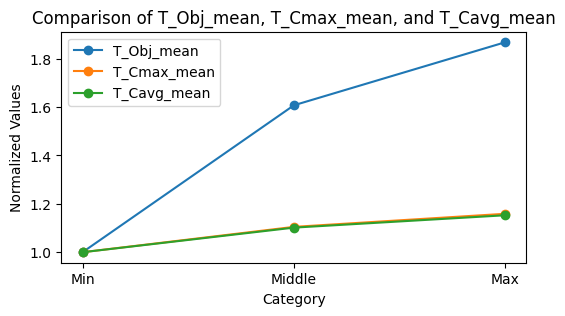

In [46]:
# File_name이 같은 데이터끼리 그룹화
grouped_data = correlation_data.groupby('File_name')

Min_T_Obj = []
Min_T_Cmax = []
Min_T_Cavg = []

Middle_T_Obj = []
Middle_T_Cmax = []
Middle_T_Cavg = []

Max_T_Obj = []
Max_T_Cmax = []
Max_T_Cavg= []

# 그룹화된 데이터마다 Type이 Min인 Objective_value값을 기준으로 Middle, Max의 Objective_value값이 Min대비 몇 배인지 계산
for name, group in grouped_data:
    group.sort_values(by='Type')
    group['T_Obj'] = group['Objective_value'] / group['Objective_value'].iloc[0]
    group['T_Cmax'] = group['C_max'] / group['C_max'].iloc[0]
    group['T_Cavg'] = group['C_avg'] / group['C_avg'].iloc[0]

    # 각 행의 Type이 Min인지 Middle인지 Max인지에 따라 T_Obj, T_Cmax, T_Cavg의 리스트에 append
    for i in range(len(group)):
        if group['Type'].iloc[i] == 'Min':
            Min_T_Obj.append(group['T_Obj'].iloc[i])
            Min_T_Cmax.append(group['T_Cmax'].iloc[i])
            Min_T_Cavg.append(group['T_Cavg'].iloc[i])
        elif group['Type'].iloc[i] == 'Middle':
            Middle_T_Obj.append(group['T_Obj'].iloc[i])
            Middle_T_Cmax.append(group['T_Cmax'].iloc[i])
            Middle_T_Cavg.append(group['T_Cavg'].iloc[i])
        elif group['Type'].iloc[i] == 'Max':
            Max_T_Obj.append(group['T_Obj'].iloc[i])
            Max_T_Cmax.append(group['T_Cmax'].iloc[i])
            Max_T_Cavg.append(group['T_Cavg'].iloc[i])

    # print(group)
Min_T_Obj_mean = sum(Min_T_Obj) / len(Min_T_Obj)
Middle_T_Obj_mean = sum(Middle_T_Obj) / len(Middle_T_Obj)
Max_T_Obj_mean = sum(Max_T_Obj) / len(Max_T_Obj)

Min_T_Cmax_mean = sum(Min_T_Cmax) / len(Min_T_Cmax)
Middle_T_Cmax_mean = sum(Middle_T_Cmax) / len(Middle_T_Cmax)
Max_T_Cmax_mean = sum(Max_T_Cmax) / len(Max_T_Cmax)

Min_T_Cavg_mean = sum(Min_T_Cavg) / len(Min_T_Cavg)
Middle_T_Cavg_mean = sum(Middle_T_Cavg) / len(Middle_T_Cavg)
Max_T_Cavg_mean = sum(Max_T_Cavg) / len(Max_T_Cavg)

print('Min_T_Obj_mean: ', Min_T_Obj_mean)
print('Middle_T_Obj_mean: ', Middle_T_Obj_mean)
print('Max_T_Obj_mean: ', Max_T_Obj_mean)

print('Min_T_Cmax_mean: ', Min_T_Cmax_mean)
print('Middle_T_Cmax_mean: ', Middle_T_Cmax_mean)
print('Max_T_Cmax_mean: ', Max_T_Cmax_mean)

print('Min_T_Cavg_mean: ', Min_T_Cavg_mean)
print('Middle_T_Cavg_mean: ', Middle_T_Cavg_mean)
print('Max_T_Cavg_mean: ', Max_T_Cavg_mean)







import matplotlib.pyplot as plt

# Data
categories = ['Min', 'Middle', 'Max']
T_Obj_mean_values = [1.0, 1.6072787805460507, 1.867859038805344]
T_Cmax_mean_values = [1.0, 1.1047801204082925, 1.1588740953515628]
T_Cavg_mean_values = [1.0, 1.101653043545311, 1.1527811993173553]

# Plotting
plt.figure(figsize=(6, 3))

# Line plot for T_Obj_mean
plt.plot(categories, T_Obj_mean_values, marker='o', label='T_Obj_mean')

# Line plot for T_Cmax_mean
plt.plot(categories, T_Cmax_mean_values, marker='o', label='T_Cmax_mean')

# Line plot for T_Cavg_mean
plt.plot(categories, T_Cavg_mean_values, marker='o', label='T_Cavg_mean')

# Title and labels
plt.title('Comparison of T_Obj_mean, T_Cmax_mean, and T_Cavg_mean')
plt.xlabel('Category')
plt.ylabel('Normalized Values')  # Assuming these are normalized values

# Legend
plt.legend()

# Display the plot
plt.show()



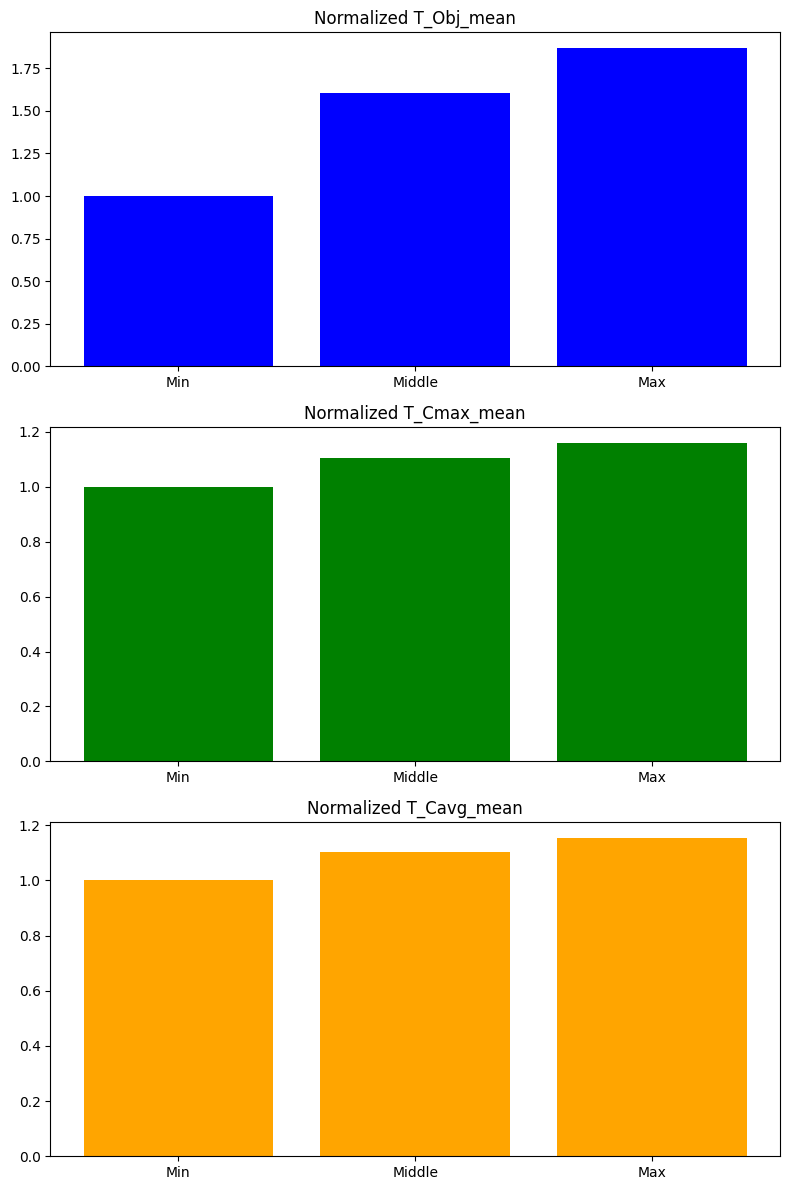

In [47]:
import matplotlib.pyplot as plt

# Data
categories = ['Min', 'Middle', 'Max']
T_Obj_mean_values = [1.0, 1.6072787805460507, 1.867859038805344]
T_Cmax_mean_values = [1.0, 1.1047801204082925, 1.1588740953515628]
T_Cavg_mean_values = [1.0, 1.101653043545311, 1.1527811993173553]

# Find minimum values for normalization
min_T_Obj_mean = min(T_Obj_mean_values)
min_T_Cmax_mean = min(T_Cmax_mean_values)
min_T_Cavg_mean = min(T_Cavg_mean_values)

# Normalize data using minimum values
norm_T_Obj_mean = [val / min_T_Obj_mean for val in T_Obj_mean_values]
norm_T_Cmax_mean = [val / min_T_Cmax_mean for val in T_Cmax_mean_values]
norm_T_Cavg_mean = [val / min_T_Cavg_mean for val in T_Cavg_mean_values]

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plot normalized T_Obj_mean
ax1.bar(categories, norm_T_Obj_mean, color='blue')
ax1.set_title('Normalized T_Obj_mean')

# Plot normalized T_Cmax_mean
ax2.bar(categories, norm_T_Cmax_mean, color='green')
ax2.set_title('Normalized T_Cmax_mean')

# Plot normalized T_Cavg_mean
ax3.bar(categories, norm_T_Cavg_mean, color='orange')
ax3.set_title('Normalized T_Cavg_mean')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
